# In class project for Monday 11/16 (due date Monday 11/23)

# Clustering 

Our vision and visual brain are extremely efficient at identifying groups of objects in space. Achieving the same result using algorithmic calculation is nontrivial. **Clustering** is an example of **unsupervised learning**, i.e. works on unlabeled (no target) data.

Consider the following toy datasets in two dimensions (for easy visualization):

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets

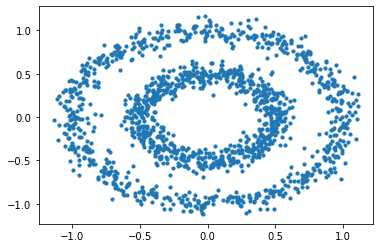

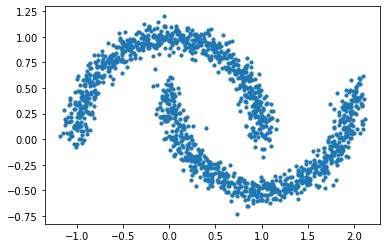

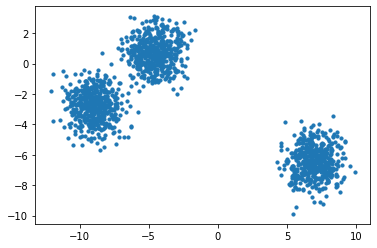

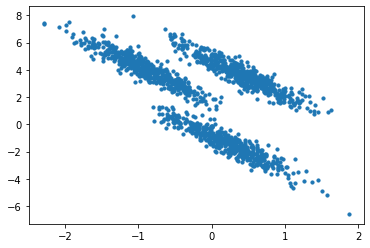

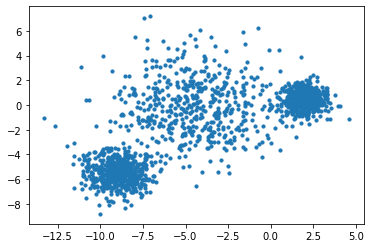

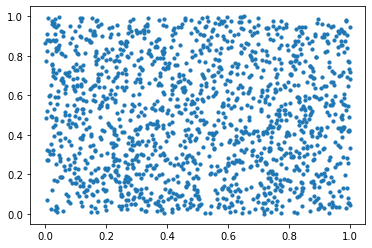

In [3]:
# reproducability
np.random.seed(0)
# sample size
n_samples = 1500
# dot size for scatter plots. Choose a smaller dotsize for larger sample sizes.
dotsize =10

# Cluster 1 
plt.figure() 
X1, y1 = datasets.make_circles(n_samples=n_samples, factor=0.5,noise=0.07)
plt.scatter(X1[:, 0], X1[:, 1],s=dotsize)
# Cluster 2 
plt.figure()
X2, y2 = datasets.make_moons(n_samples=n_samples, noise=.07)
plt.scatter(X2[:, 0], X2[:, 1],s=dotsize)
# Cluster 3 
plt.figure()
X3, y3 = datasets.make_blobs(n_samples=n_samples, random_state=15)
plt.scatter(X3[:, 0], X3[:, 1],s=dotsize)
# Cluster 4 
plt.figure()
X_raw, y4 = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.2, -0.9], [-0.4, 0.8]]
X4 = np.dot(X_raw, transformation)
plt.scatter(X4[:, 0], X4[:, 1],s=dotsize)
# Cluster 5 
plt.figure()
X5,y5 = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.7],
                             random_state=170)
plt.scatter(X5[:, 0], X5[:, 1],s=dotsize)
# Cluster 6
plt.figure()
X6 = np.random.rand(n_samples, 2)
y6 = np.zeros(n_samples,dtype=np.int8)
plt.scatter(X6[:, 0], X6[:, 1],s=dotsize)
plt.show() 

The target vector *y* contains the grouping used in generating the data. 
It can be used to measure the accuracy of the assignments of the clustering algorithms
but it not used as input.

Introducing colors

Colors in matplotlib

https://matplotlib.org/3.1.1/api/colors_api.html

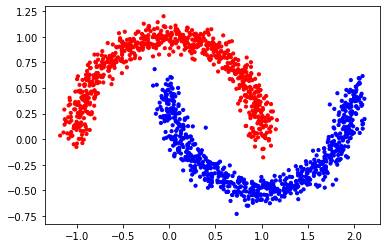

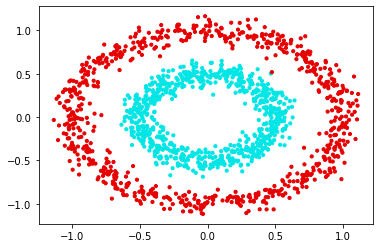

In [4]:
colors1 = np.array(['r','b','g'])
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=dotsize, color=colors1[y2])

# predefined colors
colors2 = np.array(['r','b','g'])
# colors as red,green blue value in hex
colors3 = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c','#dede00'])
                                             # colors as red,green blue value as tuple
colors4 = np.array([(0.9,0.0,0.0),(0.0,0.9,0.9),(0.5,0.5,0.1)])
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], s=dotsize, color=colors4[y1])
plt.show()

# Clustering algorithms

We learned three algorithms for unsupervised learning:

## K-means
https://scikit-learn.org/stable/modules/clustering.html#k-means
## Hierarchical clustering
https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
## Gaussian Mixture Models
https://scikit-learn.org/stable/modules/mixture.html#mixture

Many more algorithms exist and are available in sklearn, see (https://scikit-learn.org/stable/modules/clustering.html)


# Project for Monday 11/16 (due date Monday 11/23)

Apply the three algorithms discussed in class to the six datasets in this notebook. Perform the following tasks and/or answer the following questions:

1. Read the description of the algorithm and estimate for which datasets the method will succeed or fail.
1. What parameters does the cluster algorithm need and what do they do? Demonstrate by varying the parameters.
1. Visualize your results. 
1. For which dataset did the algorithms succeed and for which ones did they fail. Can you explain why?
1. It is allowed to start from example codes from the sklearn website (or elsewhere) for this project as long as you reference the original code (provide a www link).
1. (optional, for extra credit) choose one other clstering algorithm and explain how it works. Apply tot the six data sets as outlined for the other methods.
1. Submit via canvas.

## For KMeans 
Answers to prompt: 

1. For datasets 1, 2, and 6 will most likely fail and 3, 4, 5 will most likely succeed though I predict 4 might fail as well. 

2. The parameters for KMeans are:
    
- **init** : Controls the initialization technique. Can either be "random" which is the default or "k-means++" which employs an advanced trick to speed up convergence

- **n_clusters** : Sets k for the clustering step. 

- **n_init** : Sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

- **max_iter** : Sets the number of maximum iterations for each initialization of the k-means algorithm.

3. **For visualization, see below.** 

4. For datasets 3, 5, and possibly 6 the algorithm appears to have succeeded. For datasets 1, 2, 4, the algorithm failed. My understanding of KMeans is that it is dependent on finding the center of the cluster which does not exists for exotic shapes like the moon or the enclosed circles or the extended streaks. As such, not being able to identify the center resulted in a failed application of the algorithm. 


In [5]:
from sklearn.cluster import KMeans

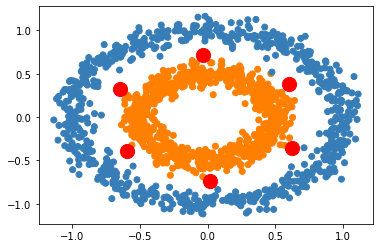

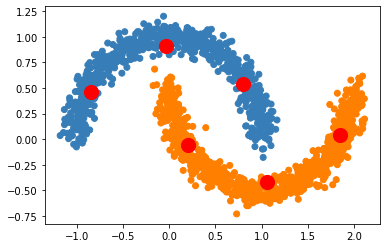

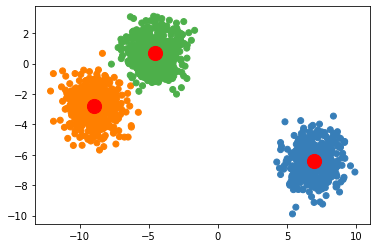

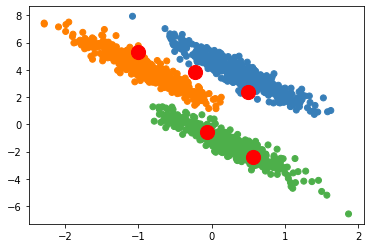

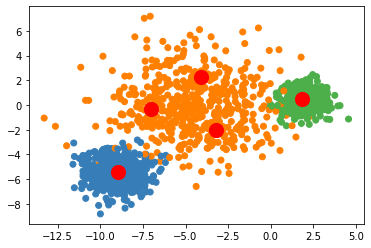

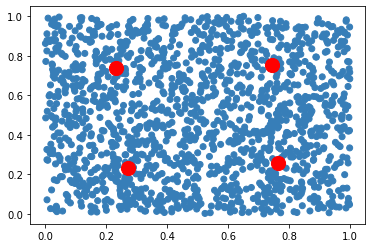

In [6]:
# Guide from: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# To find the optimal number of clusters, we will use the elbow method 
# The elbow method states that the optimal number of cluster is derived from the value which a decrease in linear fashion is evident  

def optimal_cluster(data): 
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Defining a function that generates the cluster centers 
def kvisual(datax, datay, cluster):
    kmeans = KMeans(n_clusters = cluster, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    pred_y = kmeans.fit_predict(datax)
    plt.scatter(datax[:,0], datax[:,1], c = colors3[datay])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red')
    plt.show()

# Finding optimal cluster number
# optimal_cluster(X1)
# optimal_cluster(X2)
# optimal_cluster(X3)
# optimal_cluster(X4)
# optimal_cluster(X5)
# optimal_cluster(X6)

# From the elbow methods the optimal number of clusters are as such
c1 = 6 
c2 = 6
c3 = 3
c4 = 5 
c5 = 5
c6 = 4

# Visualizing KMeans data 
kvisual(X1, y1, c1)
kvisual(X2, y2, c2)
kvisual(X3, y3, c3)
kvisual(X4, y4, c4)
kvisual(X5, y5, c5)
kvisual(X6, y6, c6)

## For Hierarchical Clustering (AgglomerativeClustering)

Answers to prompt: 

1. This algorithm should work for all of the datasets

2. The parameters for AgglomerativeClustering are:
        
  - **n_clustersint** : The number of clusters to find. It must be None if distance_threshold is not None.

  - **affinity** : Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
  
  - **memory** : Used to cache the output of the computation of the tree. By default, no caching is done. If a string is given, it is the path to the caching directory.
  
  - **connectivity** : Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
  
  - **compute_full_tree** : Stop early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples. This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree. It must be True if distance_threshold is not None. By default compute_full_tree is “auto”, which is equivalent to True when distance_threshold is not None or that n_clusters is inferior to the maximum between 100 or 0.02 * n_samples. Otherwise, “auto” is equivalent to False.

  - **linkage** : Attributes = ({“ward”, “complete”, “average”, “single”}). Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    * ward minimizes the variance of the clusters being merged.

    * average uses the average of the distances of each observation of the two sets.

    * complete or maximum linkage uses the maximum distances between all observations of the two sets.
    
    * single uses the minimum of the distances between all observations of the two sets.

    
  - **distance_threshold** : The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.


3. **For visualization, see below.** 

4. The algorithm works for any of the datasets, none of them failed per say. This is because there are different types of linkage available to the agglomerativeclustering algorithm that benefits the user depending on what they are trying to cluster. Though ward linkage would be a go to, I can see why for data sets like X1 and X2 would be more informative with single linkage. 


In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

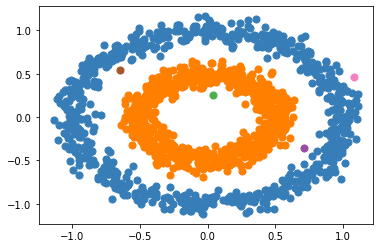

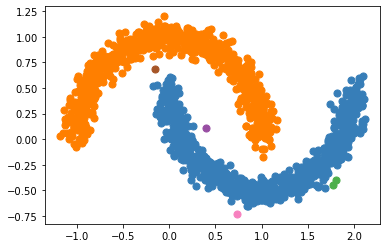

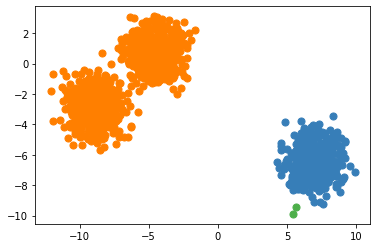

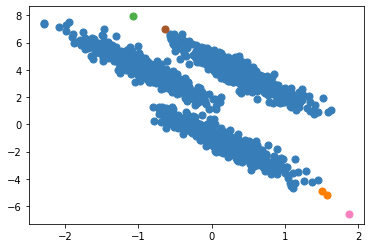

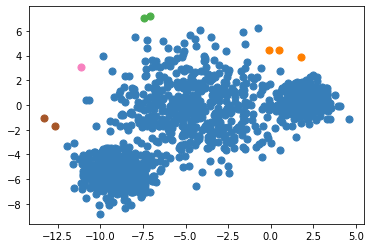

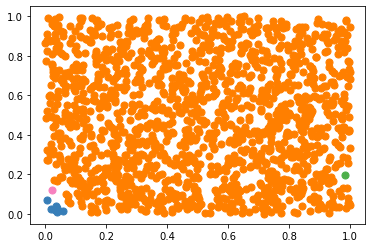

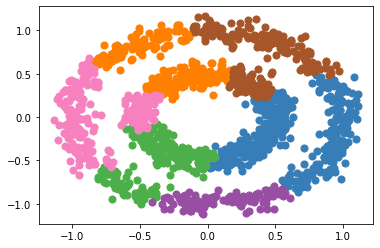

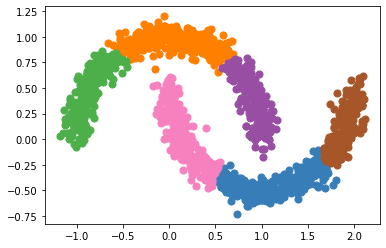

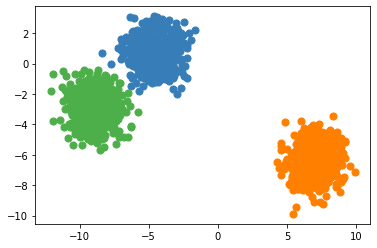

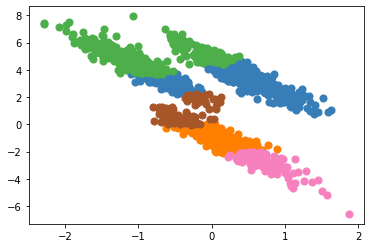

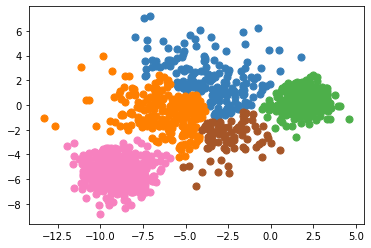

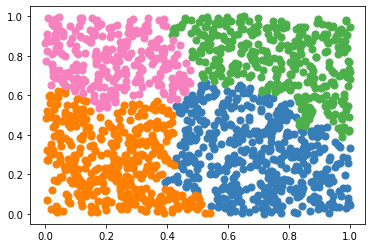

In [8]:
# Guide from: https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
# To find the optimal number of clusters, we will use the dendogram to determine the highest vertical distance that doesn't intersect with any any clusters 

def dendo(data): 
    sch.dendrogram(sch.linkage(data, method='ward'))
    plt.show()

def AC_single(data,cluster):
    model = AgglomerativeClustering(n_clusters = cluster, affinity ='euclidean', linkage ='single')
    model.fit(data)
    labels = model.labels_
    # print(np.unique((labels)))  
    for i in np.arange(len(np.unique((labels)))):
        plt.scatter(data[labels==i, 0], data[labels==i, 1], s=50, marker='o', color=colors3[i])  
    plt.show()
def AC_ward(data, cluster):
    model = AgglomerativeClustering(n_clusters = cluster, affinity ='euclidean', linkage ='ward')
    model.fit(data)
    labels = model.labels_
    # print(np.unique((labels)))  
    for i in np.arange(len(np.unique((labels)))):
        plt.scatter(data[labels==i, 0], data[labels==i, 1], s=50, marker='o', color=colors3[i])  
    plt.show()

# Finding the optimal cluster number 
# dendo(X1)
# dendo(X2)
# dendo(X3)
# dendo(X4)
# dendo(X5)
# dendo(X6)

# Using deno to determine the optimal number of clusters 
p1 = 6
p2 = 6
p3 = 3
p4 = 5
p5 = 5
p6 = 4

# Applying the AgglomerativeClustering
# Two types of AgglomerativeClustering linkage is shown to show the different benefits of the different linkages
# In this case, it show cases the ward and single linkage 
AC_single(X1, 6)
AC_single(X2, 6)
AC_single(X3, 3)
AC_single(X4, 5)
AC_single(X5, 5)
AC_single(X6, 4)
AC_ward(X1, 6)
AC_ward(X2, 6)
AC_ward(X3, 3)
AC_ward(X4, 5)
AC_ward(X5, 5)
AC_ward(X6, 4)




## For Gaussian Mixture Models 
Answers to prompt: 

1. For datasets 1, 2, 3, and 4, I would predict that the algorithm would succeed in generating the GMM. However for datasets 5 and 6, i would predict that the algorithm would fail due to how the data is being distributed.  

2. The parameters for GMM are:
  
  - **n_components** : The number of mixture components.
  
  - **covariance_type** : args = {‘full’ (default), ‘tied’, ‘diag’, ‘spherical’}

    Definition for each: 

      - full =  each component has its own general covariance matrix
      - tied = all components share the same general covariance matrix
      - diag = each component has its own diagonal covariance matrix
      - spherical = each component has its own single variance
  - **There are others but as of now, not too useful**



3. **For visualization, see below.** 

4. The algorithm did not succeed for datasets 1, 3, and 4 but appears to have worked for datasets 2, 5, and 6. This is rather peculiar as I would assume that it would work for most except for those with a bizarre distribution. Instead it appears that the algorithm works well for datas that are being mixed with one another. 



In [43]:
from sklearn.mixture import GaussianMixture

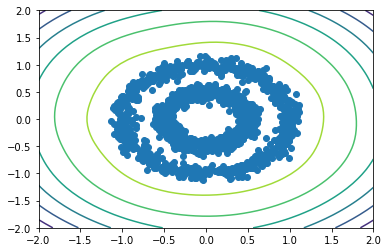

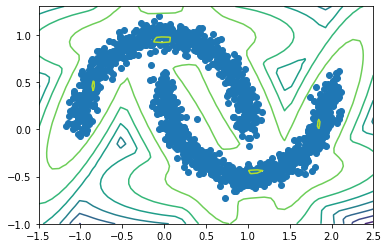

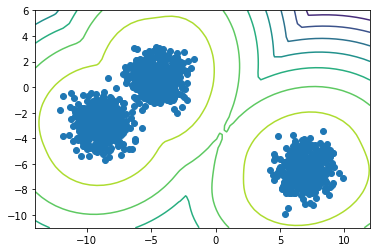

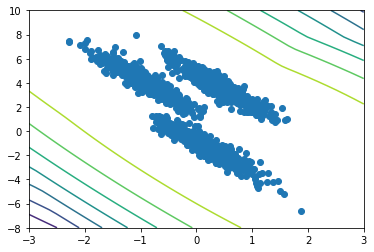

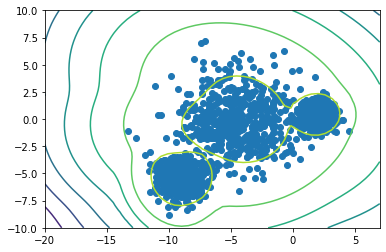

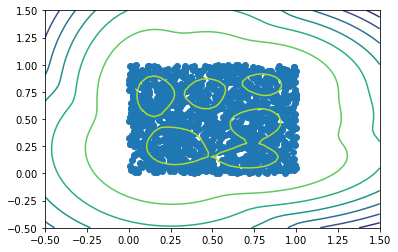

In [61]:
# Guide from: https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/
# and https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f
# and https://data-flair.training/blogs/gaussian-mixture-model/ 
# as noted from the guides, we can borrow the number of clusters from KMeans calculations as our n_components value, or more so as using KMeans to have an idea of the number of clusters in the datasets 

def gaussmm(data, cluster, xmin, xmax, ymin, ymax): 
    gmm_model = GaussianMixture(n_components=6).fit(data)

    X, Y = np.meshgrid(np.linspace(xmin, xmax), np.linspace(ymin, ymax))
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = gmm_model.score_samples(XX)
    Z = Z.reshape((50,50))
    
    plt.contour(X, Y, Z)
    plt.scatter(data[:, 0], data[:, 1])
    
    plt.show()

gaussmm(X1, c1, -2, 2, -2, 2)
gaussmm(X2, c2, -1.5, 2.5, -1, 1.3)
gaussmm(X3, c3, -14, 12, -11, 6)
gaussmm(X4, c4, -3, 3, -8, 10)
gaussmm(X5, c5, -20, 7, -10, 10)
gaussmm(X6, c6, -0.5, 1.5, -0.5, 1.5)
